<h1>Libraries

In [1]:
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
'''Clase para determinar la matriz de confusión'''
from sklearn.metrics import confusion_matrix
'''Graficar la matriz de confusión'''
from sklearn.metrics import plot_confusion_matrix

<h1>Lectura de Caracteristicas y etiquetas

In [2]:
test_size    = 0.20
seed         = 9
h5_color     = '/content/drive/MyDrive/HOG/histogramaDataset.h5'
h5_colorLb   = '/content/drive/MyDrive/HOG/histogramaDatasetlabels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [3]:
# import the feature vector and trained labels
h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['ojosCaracteristicas']
color_features_labels_string   = h5f_colorLb['ojosCaracteristicas_Etiquetas']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (2422, 512)
[STATUS] labels shape: (2422,)
[STATUS] training started...


In [4]:
global_features = np.hstack([color_features])
print("[STATUS] features shape: {}".format(global_features.shape))


[STATUS] features shape: (2422, 512)


<h1>Identify X and Y

In [5]:
X = global_features
Y = color_features_labels

<h1>Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                        test_size   = test_size,
                                        random_state = seed)

X_train.shape, X_test.shape

((1937, 512), (485, 512))

<h1>Kernels

In [7]:
sigmoid_param_grid = {
        "kernel": ["sigmoid"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

<h1>Sigmoid Kernel

In [8]:
sigmoid_grid = GridSearchCV(svm.SVC(), sigmoid_param_grid)
sigmoid_grid = sigmoid_grid.fit(X_train,y_train)
print(sigmoid_grid.best_estimator_)

SVC(C=1000, decision_function_shape='ovo', gamma='auto', kernel='sigmoid')


<h1> Predicción

In [9]:
sigmoid_pred = sigmoid_grid.predict(X_test)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_pred)
sigmoid_precision = precision_score(y_test, sigmoid_pred, average='weighted')
sigmoid_recall = recall_score(y_test, sigmoid_pred, average='weighted')
sigmoid_f1 = f1_score(y_test, sigmoid_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (sigmoid_accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (sigmoid_f1*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (sigmoid_precision*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (sigmoid_recall*100))

Accuracy (Sigmoid Kernel):  71.75
F1 (Sigmoid Kernel):  71.44
Precision (Sigmoid Kernel):  72.19
Recall (Sigmoid Kernel):  71.75


<h1> Métricas

In [10]:
results = cross_validate(estimator=sigmoid_grid, X=X_train, y=y_train, cv=8, scoring=scoring)

print('Accuracy (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_accuracy'])*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_f1_score'])*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_precision'])*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_recall'])*100))

Accuracy (Sigmoid Kernel):  70.57
F1 (Sigmoid Kernel):  70.32
Precision (Sigmoid Kernel):  71.18
Recall (Sigmoid Kernel):  70.57


<h1> Matriz de Confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


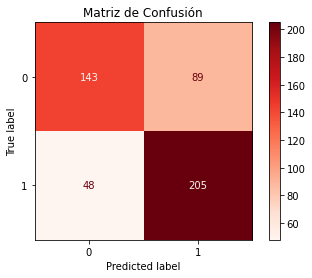

In [12]:
confusion_matrix(y_test, sigmoid_pred)
plot_confusion_matrix(sigmoid_grid, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Matriz de Confusión")
plt.show()